# Smart A/B Hypothesis Testing : AD Campaign Performance

The data we have got has 8 columns, i.e.

        - auction_id: the unique id of the online user who has been presented
                      the BIO. In standard terminologies this is called an impression id. The
                      user may see the BIO questionnaire but choose not to respond. In that
                      case both the yes and no columns are zero.
        - Experiment: which group the user belongs to - control or exposed
        - date: the date in YYYY-MM-DD format
        - device_make: the name of the type of device the user has e.g. Samsung
        - platform_os: the id of the OS the user has
        - browser: the name of the browser the user uses to see the BIO
                   questionnaire
        - yes: 1 if the user chooses the “Yes” radio button for the BIO
               questionnaire
        - no: 1 if the user chooses the “No” radio button for the BIO questionnaire


# Visualizing

In [3]:
#Adding path of the scripts
import sys
sys.path.insert(0,'../Scripts/')

In [4]:
#Importing important modules
import dvc.api
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Configuring Notebook settings
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('max_column', None)

In [8]:
#Importing the collected Data
data = pd.read_csv('../data/AdSmartABdata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [9]:
data.describe()

,hour,platform_os,yes,no
count,8077.00,8077.00,8077.00,8077.00
mean,11.62,5.95,0.07,0.08
std,5.73,0.22,0.26,0.28
min,0.00,5.00,0.00,0.00
25%,7.00,6.00,0.00,0.00
50%,13.00,6.00,0.00,0.00
75%,15.00,6.00,0.00,0.00
max,23.00,7.00,1.00,1.00


In [10]:
#to know the total amount of data
data.shape[0]

8077

In [11]:
#checking if there is redundancy in the data
number_of_users = data.auction_id.unique()
# Number of users must be equal to row size of the collected data
print(f'The data has {collected_data.shape[0] - len(number_of_users)} repeated users.')

The data has 0 repeated users.


In [12]:
#Users who actually responded yes/no to the question of awareness
answered_df = collected_data.copy(deep=True)
answered_df = answered_df[answered_df['yes'] == 1].append(answered_df[answered_df['no'] == 1])
answered_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [13]:
#total count of who answered
answered_df.shape[0]

1243

In [78]:
# Percentage of users who responded from collected data
answered_percentage = answered_df.shape[0] / data.shape[0]
print('The number of users who answered are: {:.3%}'.format(answered_percentage))

The number of users who answered are: 15.389%


## control Group

In [14]:
#the amount of controlled group from the actual respondents(with yes/no answers)
control_df = answered_df[answered_df['experiment'] == 'control']
control_df.shape[0]

586

## Exposed Group

In [15]:
#the amount of controlled group from the actual respondents(with yes/no answers)
exposed_df = answered_df[answered_df['experiment'] == 'exposed']
exposed_df.shape[0]

657

##### so the answered group consist of 657 treatment and 586 control group 

# Response distribution for both Experiment group

### control Group

In [16]:
#distributing the yes or no columns together as a response column
df_1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df_1['response'] = 1
df_2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df_2['response'] = 0
control_plot_df = df_1.append(df_2).reset_index(drop=True)
control_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
1,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
2,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
3,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
4,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


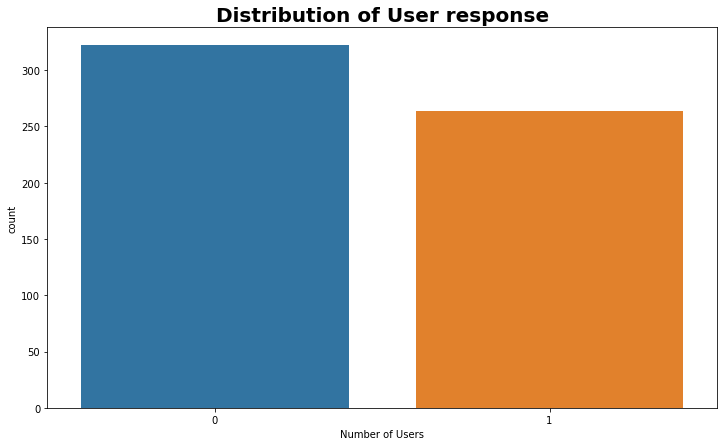

In [41]:
from Graphs import draw
draw.plot_count(control_plot_df, 'response')


### Exposed Group

In [18]:
#distributing the yes or no columns together as a response column
df_1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df_1['response'] = 1
df_2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df_2['response'] = 0
exposed_plot_df = df_1.append(df_2).reset_index(drop=True)
exposed_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


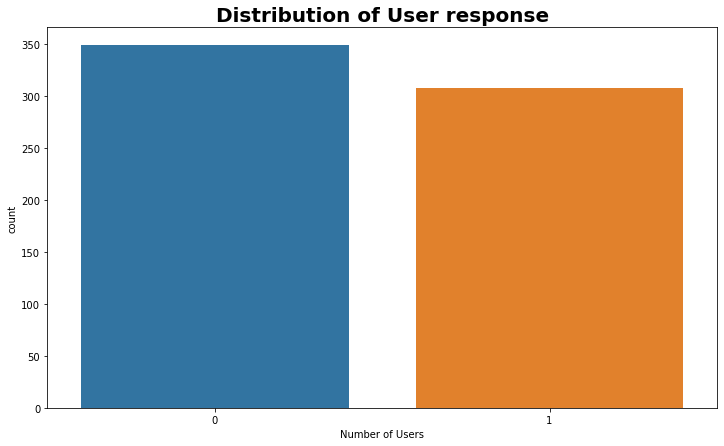

In [19]:
draw.plot_count(exposed_plot_df, 'response')

#### so we can see the positive response growed for the exposed group

# Percentage calculation

In [20]:
# Controlled Group
con_answered_percentage = control_df.shape[0] / answered_df.shape[0]
print('The percentage of users from answered group who are under experment control are: {:.2%}'.format(con_answered_percentage))
# Exposed Group
exp_answered_percentage = exposed_df.shape[0] / answered_df.shape[0]
print('The percentage of users from answered group who are under experment exposed are: {:.2%}'.format(exp_answered_percentage))

The percentage of users from answered group who are under experment control are: 47.14%
The percentage of users from answered group who are under experment exposed are: 52.86%


### positivity in response

In [21]:
#control positivity out of 586
pos_control_df = control_df[control_df['yes'] == 1]
pos_control_df.shape[0]


264

In [22]:
#control positivity out of 586
pos_exposed_df = exposed_df[exposed_df['yes'] == 1]
pos_exposed_df.shape[0]

308

In [23]:
#so in percentage
pos_con_answered_percentage = pos_control_df.shape[0] / control_df.shape[0]
print('The percentage of users from the control group who answered "yes": {:.2%}'.format(pos_con_answered_percentage))
# Exposed Group Positive answer
pos_exp_answered_percentage = pos_exposed_df.shape[0] / exposed_df.shape[0]
print('The percentage of users from the exposed group who answered "yes": {:.2%}'.format(pos_exp_answered_percentage))

The percentage of users from the control group who answered "yes": 45.05%
The percentage of users from the exposed group who answered "yes": 46.88%


## Combined Data using yes or no answers as responses

In [24]:
all_yes_df = control_df[control_df['yes'] == 1].append(exposed_df[exposed_df['yes'] == 1])
all_yes_df = all_yes_df.drop(['yes','no'], axis = 1)
all_yes_df['response'] = 1
#All users who answered no
all_no_df = control_df[control_df['no'] == 1].append(exposed_df[exposed_df['no'] == 1])
all_no_df = all_no_df.drop(['yes','no'], axis = 1)
all_no_df['response'] = 0
#Final Combined dataframe will be
combined_df = all_yes_df.append(all_no_df)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,66018aa0-7f55-4a69-a9e6-e0728354cc29,exposed,2020-07-04,19,Generic Smartphone,6,Chrome Mobile,0
1,e8df0b21-3105-4f78-8797-b178e0be131c,control,2020-07-09,21,Generic Smartphone,6,Chrome Mobile,0
2,f6b7f0e9-7bb1-4c46-ac29-359e872de73d,exposed,2020-07-09,17,Samsung SM-G975F,6,Chrome Mobile WebView,1
3,f3c258ea-2363-4645-80ef-e2383a04f509,exposed,2020-07-09,8,Generic Smartphone,6,Chrome Mobile,1
4,cf56c578-7db2-416c-9db4-af5f8a33a2c3,control,2020-07-03,15,Samsung SM-G975F,6,Facebook,0


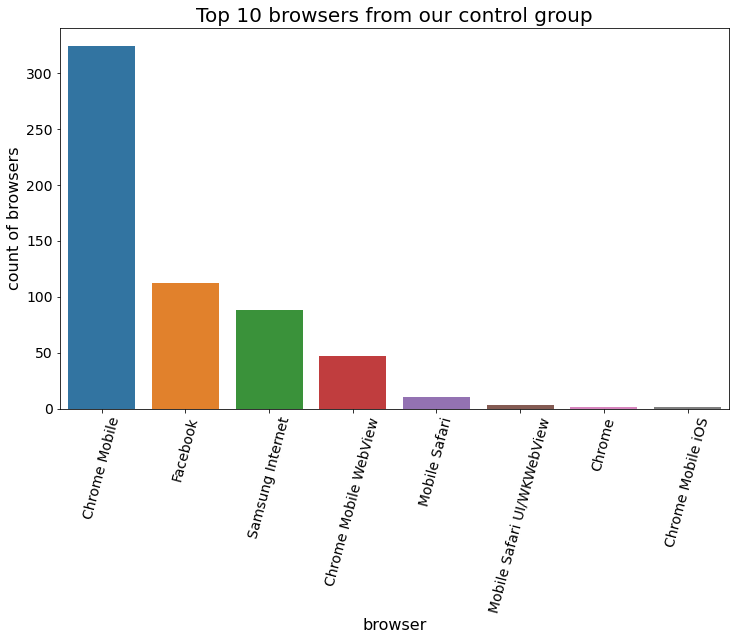

In [35]:
browser_control_df = combined_df[combined_df['experiment'] == "control"]
browser_control_df = browser_control_df[['browser', 'experiment']].sort_values(by="browser", ascending=False)
browser_control_df = browser_control_df.groupby('browser').agg({'browser': 'count'})
browser_control_df = browser_control_df.rename(columns={'browser': 'count of browsers'})
browser_control_df['browser'] = browser_control_df.index
browser_control_df = browser_control_df.sort_values(by="count of browsers", ascending=False)
draw.plot_bar(browser_control_df.head(10), x_col='browser', y_col='count of browsers',
               title="Top 10 browsers from our control group", xlabel="browser", ylabel="count of browsers")

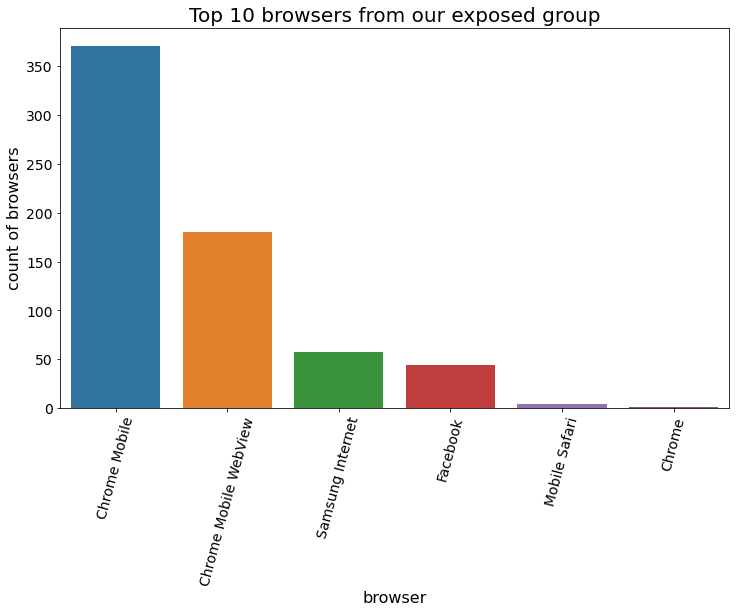

In [31]:
browser_exposed_df =combined_df[combined_df['experiment'] == "exposed"]
browser_exposed_df = browser_exposed_df[['browser', 'experiment']].sort_values(by="browser", ascending=False)
browser_exposed_df = browser_exposed_df.groupby('browser').agg({'browser': 'count'})
browser_exposed_df = browser_exposed_df.rename(columns={'browser': 'count of browsers'})
browser_exposed_df['browser'] = browser_exposed_df.index
browser_exposed_df = browser_exposed_df.sort_values(by="count of browsers", ascending=False)
draw.plot_bar(browser_exposed_df.head(10), x_col='browser', y_col='count of browsers',
               title="Top 10 browsers from our exposed group", xlabel="browser", ylabel="count of browsers")

# Grouping

In [36]:
#Based on browser used
browser_group_df = combined_df.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
browser_group_df

,experiment,hour,response
browser,,,
Chrome,2,27,1
Chrome Mobile,695,8041,314
Chrome Mobile WebView,227,2403,116
Chrome Mobile iOS,1,11,1
Facebook,156,1957,69
Mobile Safari,14,123,4
Mobile Safari UI/WKWebView,3,46,0
Samsung Internet,145,1712,67


In [25]:
#Based on Date
date_group_df = combined_df.groupby('date').agg({'experiment':'count','hour':'sum','response':'sum'})
date_group_df

,experiment,hour,response
date,,,
2020-07-03,325,4215,147
2020-07-04,159,1694,76
2020-07-05,117,1124,52
2020-07-06,74,417,35
2020-07-07,83,934,38
2020-07-08,177,2817,85
2020-07-09,184,2179,85
2020-07-10,124,940,54


In [67]:
#based on devices used
date_group_df = combined_df.groupby('device_make').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
date_group_df

,experiment,hour,response
device_make,,,
A0001,1,9,1
ANE-LX1,6,66,3
CLT-L09,5,58,0
DLI-L22,1,10,0
E5823,1,2,0
...,...,...,...
XiaoMi Redmi 6A,1,8,0
XiaoMi Redmi Note 7,1,15,0
XiaoMi Redmi S2,1,10,1


In [68]:
#based on type of OS used
os_group_df = combined_df.groupby('platform_os').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
os_group_df

,experiment,hour,response
platform_os,,,
5,17,161,5
6,1226,14159,567


# Save cleaned Data

In [70]:
combined_df.to_csv('../data/Clean_Ab_Hypothesis_Testing.csv', index=False)